In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Carregamento dos dados
df = pd.read_csv('search_results.csv')

# Visualização inicial dos dados
df

,Algorithm,ArrayType,Size,Comparisons,Movements,Time(us)
0,LinearSearch,Sorted,10,1,0,172
1,LinearSearch,Reversed,10,10,0,133
2,LinearSearch,AlmostSorted,10,3,0,155
3,LinearSearch,Random,10,10,0,172
4,LinearSearchInsert,Sorted,10,0,1,162
...,...,...,...,...,...,...
179,AVLTreeRemove,Reversed,100000,1195394,100000,33701
180,AVLTreeInsert,AlmostSorted,100000,1690897,100000,60447
181,AVLTreeRemove,AlmostSorted,100000,1392150,163670,64550
182,AVLTreeInsert,Random,100000,1476056,63180,61167


In [16]:
df.Algorithm.unique()

array(['LinearSearch', 'LinearSearchInsert', 'LinearSearchRemove',
       'BinarySearch', 'AVLTreeInsert', 'AVLTreeRemove',
       'FingerTreeInsert', 'FingerTreeRemove', 'BinarySearchTreeInsert',
       'BinarySearchTreeRemove'], dtype=object)

In [18]:
# Função para criar gráficos comparativos com escala logarítmica
def plot_log_comparison_array_type(df, metric, algorithm, title, ylabel):
    df = df[df['Algorithm'] == algorithm]
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Size', y=metric, hue='ArrayType', data=df)
    plt.yscale('log')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Tamanho do Arranjo')
    plt.legend(title='Algoritmo', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [21]:
def plot_log_comparison_algorithms(df, metric, title, ylabel):
    df = df.groupby(['Algorithm', 'Size'])[metric].mean().reset_index()
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Size', y=metric, hue='Algorithm', data=df)
    plt.yscale('log')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('tamanho do Arranjo')
    plt.show()


# Finger Tree

## Inserção

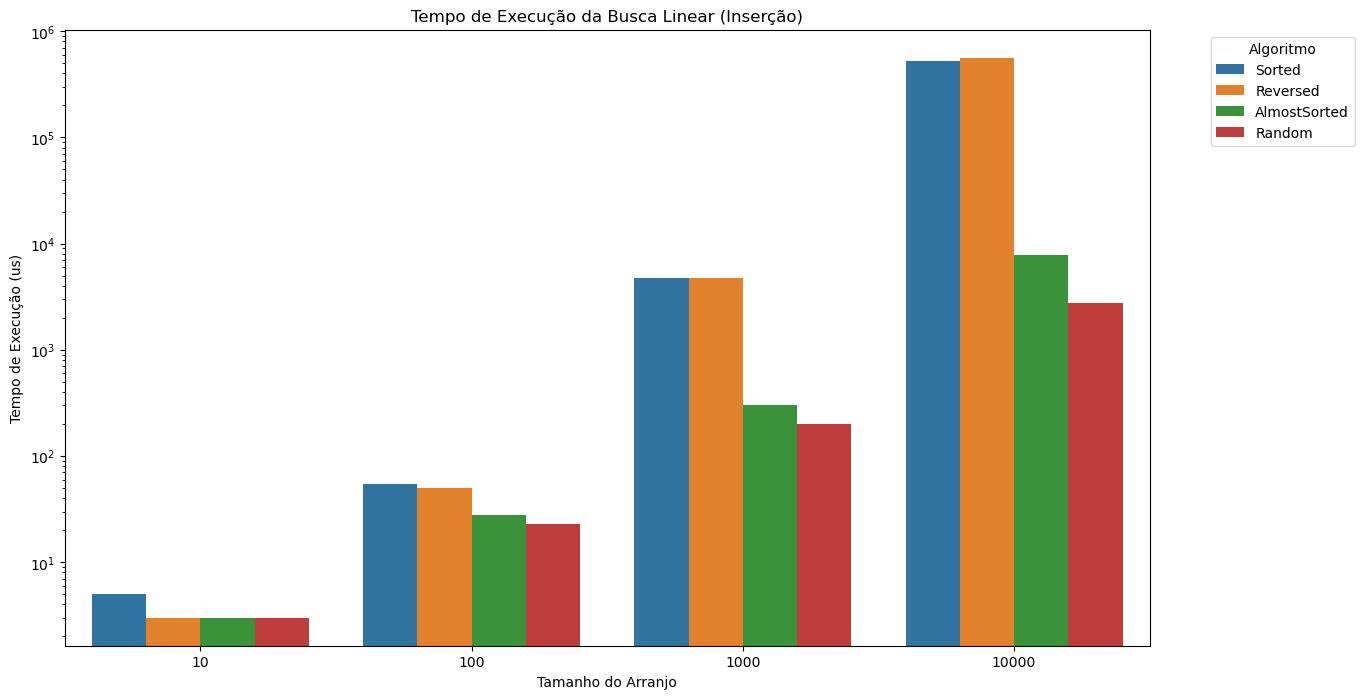

In [37]:
plot_log_comparison_array_type(df, 'Time(us)', 'FingerTreeInsert', 'Tempo de Execução da Busca Linear (Inserção)', 'Tempo de Execução (us)')

In [39]:
df_finger_tree = df[df['Algorithm'] == 'FingerTreeInsert']
df_finger_tree['Time(us)'] = pd.to_numeric(df_finger_tree['Time(us)'])
print(df_finger_tree.groupby('Size')['Time(us)'].mean())
df_finger_tree.groupby('Size')['Time(us)'].std()



Size
10            3.50
100          38.75
1000       2497.50
10000    273369.00
Name: Time(us), dtype: float64


/var/folders/85/574h3yqx42q367gsx6fddxd40000gn/T/ipykernel_36844/1389115844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finger_tree['Time(us)'] = pd.to_numeric(df_finger_tree['Time(us)'])


Size
10            1.000000
100          15.521490
1000       2592.188843
10000    310049.071620
Name: Time(us), dtype: float64

## Remoção

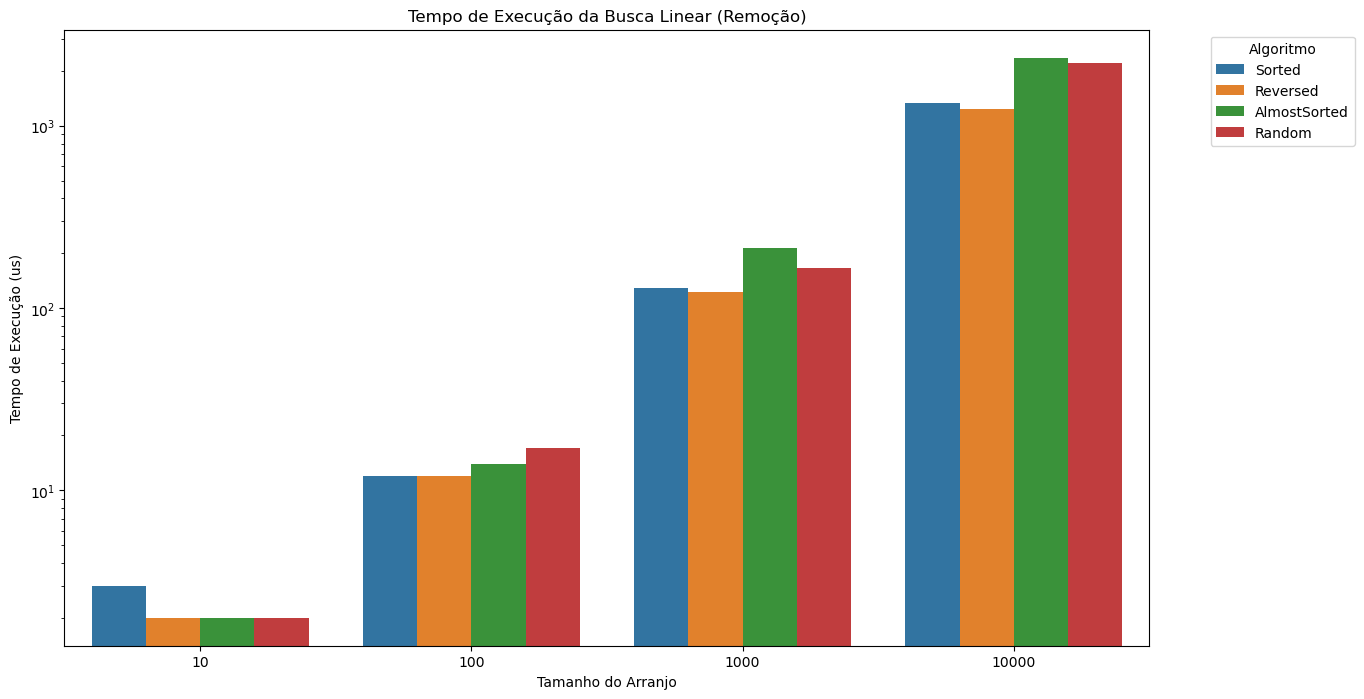

In [42]:
plot_log_comparison_array_type(df, 'Time(us)', 'FingerTreeRemove', 'Tempo de Execução da Busca Linear (Remoção)', 'Tempo de Execução (us)')

In [36]:
df_finger_tree = df[df['Algorithm'] == 'FingerTreeRemove']
df_finger_tree['Time(us)'] = pd.to_numeric(df_finger_tree['Time(us)'])
print(df_finger_tree.groupby('Size')['Time(us)'].mean())
df_finger_tree.groupby('Size')['Time(us)'].std()



Size
10          2.25
100        13.75
1000      158.00
10000    1792.00
Name: Time(us), dtype: float64


/var/folders/85/574h3yqx42q367gsx6fddxd40000gn/T/ipykernel_36844/678054425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finger_tree['Time(us)'] = pd.to_numeric(df_finger_tree['Time(us)'])


Size
10         0.500000
100        2.362908
1000      41.521079
10000    585.344913
Name: Time(us), dtype: float64

## Pesquisa

In [ ]:
plot_log_comparison_array_type(df, 'Time(us)', 'FingerTreeSearch', 'Tempo de Execução da Busca Linear (Pesquisa)', 'Tempo de Execução (us)')

In [ ]:
df_finger_tree = df[df['Algorithm'] == 'FingerTreeSearch']
df_finger_tree['Time(us)'] = pd.to_numeric(df_finger_tree['Time(us)'])
print(df_finger_tree.groupby('Size')['Time(us)'].mean())
df_finger_tree.groupby('Size')['Time(us)'].std()

# Numero de comparações

In [ ]:
## Inserção

df_insert = df[df['Algorithm'].str.contains('Insert')]
plot_log_comparison_algorithms(df_insert, 'Comparison', 'Numero de comparações (Inserção)', 'Tempo de Execução (us)')

# Tempo das operações


## Inserção

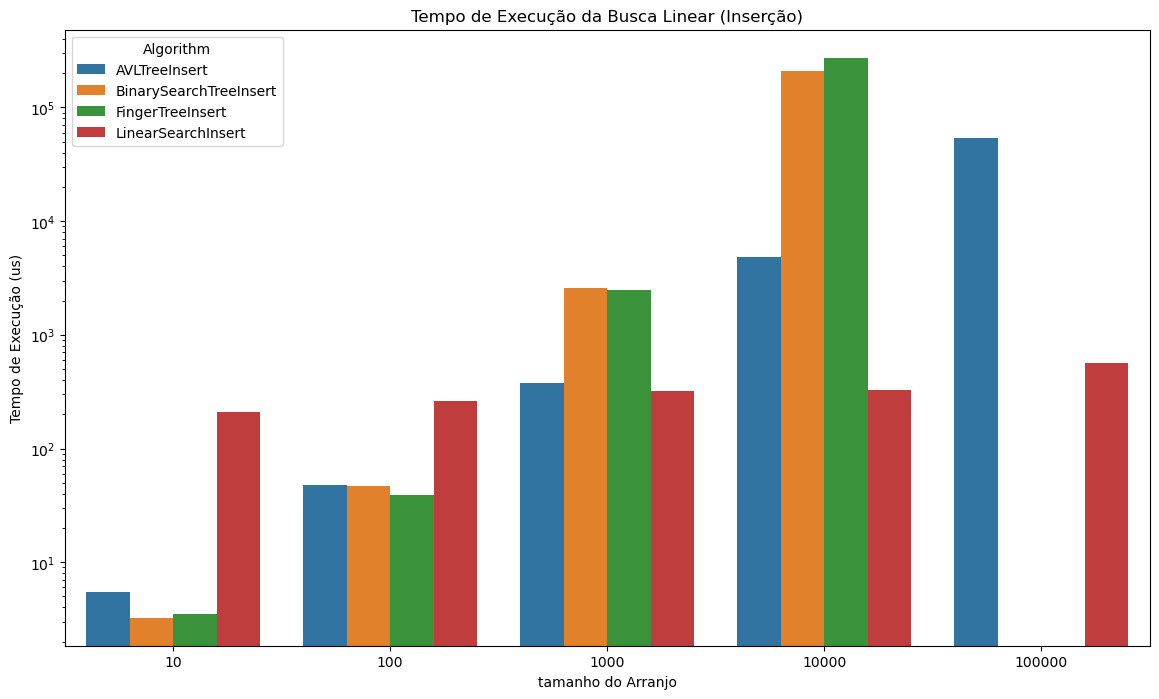

In [22]:
df_insert = df[df['Algorithm'].str.contains('Insert')]
plot_log_comparison_algorithms(df_insert, 'Time(us)', 'Tempo de Execução da Busca Linear (Inserção)', 'Tempo de Execução (us)')

## Remoção

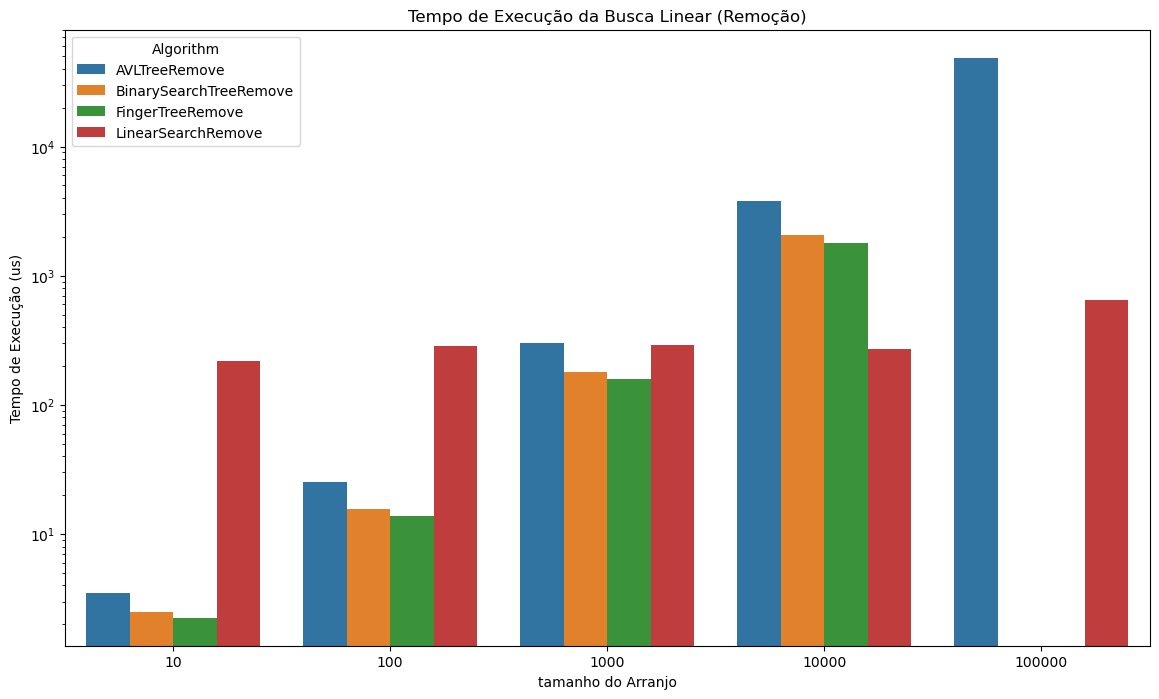

In [24]:
df_insert = df[df['Algorithm'].str.contains('Remove')]
plot_log_comparison_algorithms(df_insert, 'Time(us)', 'Tempo de Execução da Busca Linear (Remoção)', 'Tempo de Execução (us)')

## Pesquisa

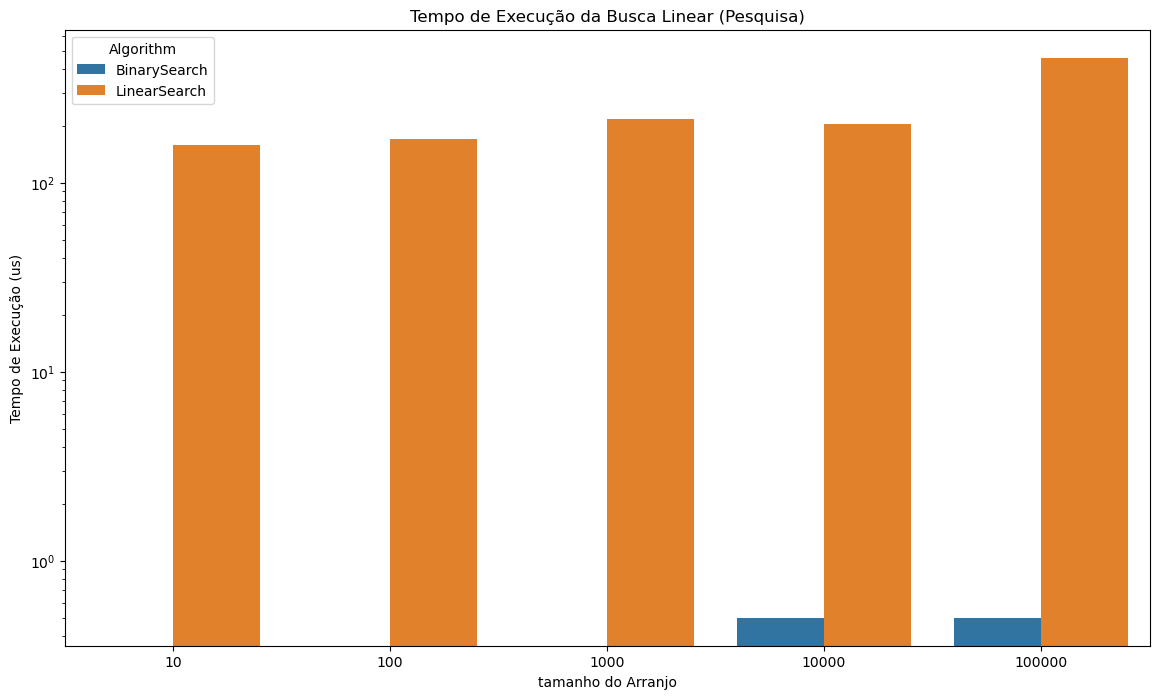

In [26]:
df_insert = df[~df['Algorithm'].str.contains('Insert|Remove')]
plot_log_comparison_algorithms(df_insert, 'Time(us)', 'Tempo de Execução da Busca Linear (Pesquisa)', 'Tempo de Execução (us)')